In [2]:
# Paths
part2_path = "/kaggle/input/assignments-pictures/"
part2_output_path = "/kaggle/working/"

In [2]:
# Imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

# Use to see progress
from tqdm import tqdm


2024-03-15 02:17:07.504336: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-15 02:17:07.504446: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-15 02:17:07.630246: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


### Part 1 - CIFAR-10 Classification using Convolution Neural Network (70 points)

Used Tensorflow for the shallow CNN and PyTorch for the Resnet18

In [14]:
# Setting up the CNN model
model = models.Sequential()

model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(units=10, activation='softmax'))
model.compile(optimizer=SGD(learning_rate=0.002),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [5]:
# Loading CIFAR10
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [6]:
# Normalizing the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Separating the testing set into the validation set and the testing set
x_validation = x_test[:5000]
y_validation = y_test[:5000]
x_test = x_test[5000:]
y_test = y_test[5000:]

y_train = to_categorical(y_train, num_classes=10)
y_validation = to_categorical(y_validation, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


In [7]:
# Initializing the 
batch_size = 32
total_epochs = 60

In [16]:
# Training model
import time
start = time.time()
history = model.fit(x_train, y_train, 
                    epochs=total_epochs, 
                    batch_size=batch_size,validation_data=(x_validation, y_validation),validation_freq=3, verbose=1)
end = time.time()
print(f"Runtime in seconds:", end - start)

Epoch 1/60
  34/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.1174 - loss: 2.2990

W0000 00:00:1710470267.851908     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.1538 - loss: 2.2436
Epoch 2/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3087 - loss: 1.9303
Epoch 3/60
1557/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3808 - loss: 1.7446

W0000 00:00:1710470283.513489     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3808 - loss: 1.7445 - val_accuracy: 0.4286 - val_loss: 1.6425
Epoch 4/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4147 - loss: 1.6331
Epoch 5/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4409 - loss: 1.5709
Epoch 6/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4588 - loss: 1.5213 - val_accuracy: 0.4650 - val_loss: 1.5150
Epoch 7/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4733 - loss: 1.4829
Epoch 8/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4902 - loss: 1.4393
Epoch 9/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5039 - loss: 1.3957 - val_accuracy: 0.4750 - val_loss: 1.5045
Epoch 10/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5153 - loss: 1.3671
Epoch 11/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5306 - loss: 1.3168
Epoch 12/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5451 - loss: 1.2908 - 

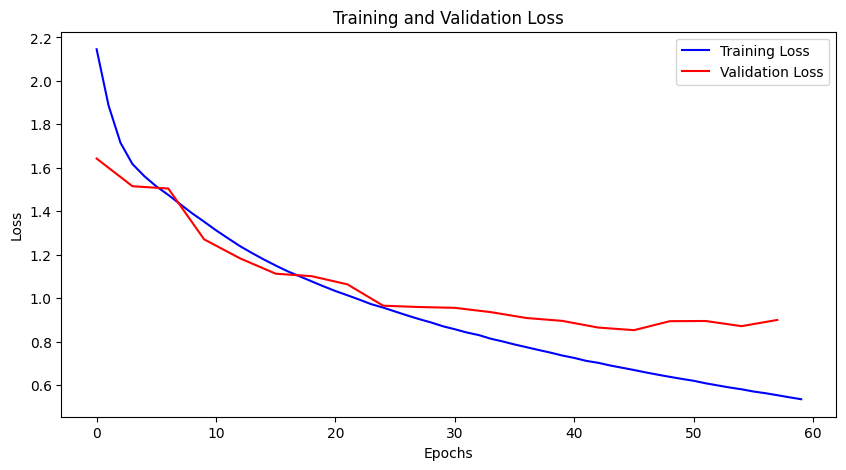

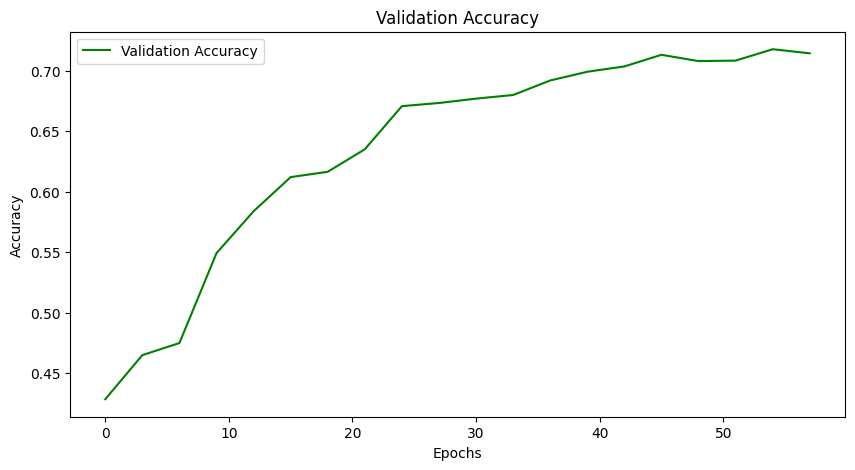

In [18]:
import matplotlib.pyplot as plt

# Extract training loss and validation loss from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create a figure and axis object for loss
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss', color='b')
plt.plot(range(0, 60, 3), val_loss, label='Validation Loss', color='r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Extract validation accuracy from history
val_acc = history.history['val_accuracy']

# Create a figure and axis object for accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(0, 60, 3), val_acc, label='Validation Accuracy', color='g')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()
plt.show()


In [19]:
# Testing model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy:", test_acc)

157/157 - 0s - 2ms/step - accuracy: 0.6986 - loss: 0.9353
Test accuracy: 0.6985999941825867


In [20]:
# Kernel size 5x5
model5 = models.Sequential()

model5.add(layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(32,32,3)))
model5.add(layers.Conv2D(filters=64, kernel_size=(5,5), activation='relu'))
model5.add(layers.MaxPooling2D(pool_size=(2,2)))

model5.add(layers.Conv2D(filters=64, kernel_size=(5,5), activation='relu'))
model5.add(layers.Conv2D(filters=64, kernel_size=(5,5), activation='relu'))

model5.add(layers.Flatten())
model5.add(layers.Dense(units=10, activation='softmax'))
model5.compile(optimizer=SGD(learning_rate=0.002),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [21]:
start = time.time()
history5 = model5.fit(x_train, y_train, 
                    epochs=total_epochs, 
                    batch_size=batch_size,validation_data=(x_validation, y_validation),validation_freq=3, verbose=1)
end = time.time()
print(f"Runtime in seconds:", end - start)

Epoch 1/60
  48/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1031 - loss: 2.3060

W0000 00:00:1710470688.851909     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.1572 - loss: 2.2572
Epoch 2/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2751 - loss: 1.9789
Epoch 3/60
1559/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3386 - loss: 1.8309

W0000 00:00:1710470706.970849     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.3386 - loss: 1.8308 - val_accuracy: 0.3844 - val_loss: 1.7106
Epoch 4/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3825 - loss: 1.7032
Epoch 5/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4217 - loss: 1.6025
Epoch 6/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4490 - loss: 1.5233 - val_accuracy: 0.4706 - val_loss: 1.4936
Epoch 7/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4723 - loss: 1.4713
Epoch 8/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4966 - loss: 1.4085
Epoch 9/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5108 - loss: 1.3690 - val_accuracy: 0.5294 - val_loss: 1.3175
Epoch 10/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5244 - loss: 1.3287
Epoch 11/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5462 - loss: 1.2825
Epoch 12/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5585 - loss: 1.2482 - 

In [22]:
test_loss, test_acc = model5.evaluate(x_test, y_test, verbose=2)
print("Test accuracy:", test_acc)

157/157 - 0s - 2ms/step - accuracy: 0.6872 - loss: 0.9827
Test accuracy: 0.6872000098228455


**Compare the run time and the test accuracy of models under different kernel sizes and briefly discuss the possible factors that affect the
performance of a CNN.**


For these implementations of a shallow CNN, the one with a kernel size of 3x3 had a runtime of 302 seconds with a test accuracy of 69.86%. In comparison, the one with a kernel size of 5x5 had a runtime of 330 seconds with a test accuracy of 68.72%. In terms of test accuracy, this seems to align with the infrastructure of a CNN as small kernels are adept at capturing fine details and require more layers to achieve a broad receptive field. Conversely, larger kernels, like 5x5, cover more spatial information in fewer layers, in exchange of accuracy. However, lower kernel size should increase the runtime as it looks at finer details compared to a higher kernel size which would do the opposite. Other architectural choices, such as the number of filters and stride size, also play crucial roles in determining the overall performance of a CNN, making the impact of kernel size a part of a broader context that influences both accuracy and efficiency.

#### ResNet18
Using Pytorch

In [23]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn as nn
from torchvision import models
from torch.utils.data import DataLoader

In [25]:
# Using transform to resize/normalize
transform = transforms.Compose([
    transforms.Resize(224),  # Resizing the images to 224x224
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR10 training and validation sets
train_set = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=4,
                                          shuffle=True, num_workers=2)

testing_set = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

# Split the testing set into testing set and validation set
testing_set, validation_set = torch.utils.data.random_split(testing_set, [5000, 5000])

# Create DataLoader for testing set
testing_loader = torch.utils.data.DataLoader(testing_set, batch_size=4,
                                             shuffle=False, num_workers=2)

# Create DataLoader for validation set
validation_loader = torch.utils.data.DataLoader(validation_set, batch_size=4,
                                                shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


In [26]:
# Using GPU power
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')

Using device: cuda:0


In [27]:
# Initializing Resnet18 model
def modify_resnet18(pretrained=True):
    model = models.resnet18(pretrained=pretrained)
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, 10)  # CIFAR10 has 10 classes
    return model

In [28]:
def train_model(model, criterion, optimizer, num_iterations=6000, validate_every=500):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        if i >= num_iterations: break
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % validate_every == (validate_every-1): # every 500 iterations
            print(f'Iteration: {i+1}, Loss: {running_loss / validate_every}')
            running_loss = 0.0
            validate_model(model, validation_loader)
    test_model(model, testing_loader)


In [29]:
def validate_model(model, dataloader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in dataloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print('Validation Accuracy: %d %%' % (100 * correct / total))
    model.train()


In [30]:
def test_model(model, dataloader):
    model.eval()  
    correct = 0
    total = 0
    with torch.no_grad():  
        for data in dataloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print('Test Accuracy of the model: %d %%' % (100 * correct / total))

In [32]:
pretrained = True  
model = modify_resnet18(pretrained=pretrained).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.002)

start = time.time()
train_model(model, criterion, optimizer)
end = time.time()
print(f"Runtime in seconds:", end - start)


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 134MB/s] 


Iteration: 500, Loss: 1.7249717756509781
Validation Accuracy: 71 %
Iteration: 1000, Loss: 1.1510292264819144
Validation Accuracy: 80 %
Iteration: 1500, Loss: 0.9453419418632985
Validation Accuracy: 84 %
Iteration: 2000, Loss: 0.7724846519455314
Validation Accuracy: 87 %
Iteration: 2500, Loss: 0.6872433366514742
Validation Accuracy: 88 %
Iteration: 3000, Loss: 0.6919160253219306
Validation Accuracy: 88 %
Iteration: 3500, Loss: 0.640759509647265
Validation Accuracy: 89 %
Iteration: 4000, Loss: 0.608559488562867
Validation Accuracy: 89 %
Iteration: 4500, Loss: 0.6562577601131052
Validation Accuracy: 89 %
Iteration: 5000, Loss: 0.6319057430494577
Validation Accuracy: 90 %
Iteration: 5500, Loss: 0.5844972790442408
Validation Accuracy: 91 %
Iteration: 6000, Loss: 0.5905115629155189
Validation Accuracy: 91 %
Test Accuracy of the model: 90 %
Runtime in seconds: 255.47156977653503


In [31]:
pretrained = False  
model = modify_resnet18(pretrained=pretrained).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.002)

start = time.time()
train_model(model, criterion, optimizer)
end = time.time()
print(f"Runtime in seconds:", end - start)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Iteration: 500, Loss: 2.189523682832718
Validation Accuracy: 23 %
Iteration: 1000, Loss: 2.079363417387009
Validation Accuracy: 26 %
Iteration: 1500, Loss: 1.9840072085857392
Validation Accuracy: 29 %
Iteration: 2000, Loss: 1.9425371520519257
Validation Accuracy: 32 %
Iteration: 2500, Loss: 1.9097623620033264
Validation Accuracy: 33 %
Iteration: 3000, Loss: 1.8549927685260772
Validation Accuracy: 35 %
Iteration: 3500, Loss: 1.812226101398468
Validation Accuracy: 38 %
Iteration: 4000, Loss: 1.7974006246328353
Validation Accuracy: 36 %
Iteration: 4500, Loss: 1.8052631107568742
Validation Accuracy: 39 %
Iteration: 5000, Loss: 1.7678671518564224
Validation Accuracy: 40 %
Iteration: 5500, Loss: 1.7506907323598861
Validation Accuracy: 42 %
Iteration: 6000, Loss: 1.7192391597032548
Validation Accuracy: 41 %
Test Accuracy of the model: 40 %
Runtime in seconds: 250.46960043907166


**Compare the impact of using a pre-trained ResNet18 versus not and discuss the reason.**

As we can see, the runtime for the pre-trained ResNet18 model versus the non-pretrained one are similar, having only 5 seconds differences between each other. However, the pre-trained one has a test accuracy of 90%, 50% higher than the non-pretrained one. This is due to deep learning models, especially those trained on large and diverse datasets, learn to identify and extract useful features from images that are often applicable across a wide range of visual recognition tasks. By leveraging these pre-learned features, a pre-trained model can more effectively understand and classify new images in related tasks with less data and in less time.

**Compare the test accuracy of the deep ResNet18 versus the shallow CNN.**

The deep ResNet18 has a much higher test accuracy compared to the implementation of the shallow CNN with 90% and 69.86%.

### Part 2 - YOLOv8 Object Detection on Montréal Streets (30 points)

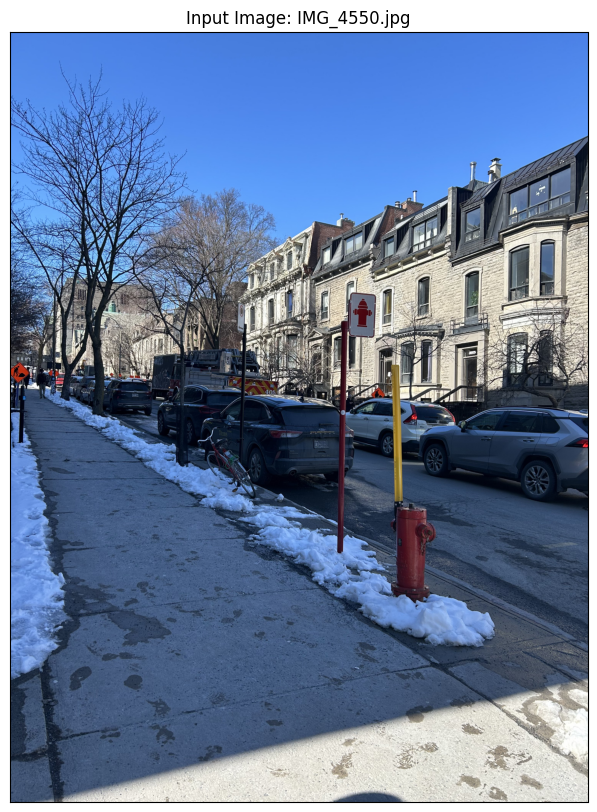

In [3]:
import cv2
import matplotlib.pyplot as plt

street_img = cv2.imread(part2_path + "IMG_4550.jpg")
street_img_rgb = cv2.cvtColor(street_img, cv2.COLOR_BGR2RGB)

# display images
plt.figure(figsize=(10,10))
plt.imshow(street_img_rgb)
plt.title("Input Image: IMG_4550.jpg"), plt.xticks([]), plt.yticks([])
plt.show()

In [4]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 559.0 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.3/721.3 kB 4.8 MB/s eta 0:00:0000:0100:01


In [5]:
from ultralytics import YOLO

# Load a pretrained YOLOv8n model
model = YOLO('yolov8n.pt')

results = model.predict(street_img)

100%|██████████| 6.23M/6.23M [00:00<00:00, 69.9MB/s]



0: 640x480 1 person, 7 cars, 1 fire hydrant, 96.9ms
Speed: 9.8ms preprocess, 96.9ms inference, 576.9ms postprocess per image at shape (1, 3, 640, 480)


In [6]:
# From https://docs.ultralytics.com/modes/predict/#plotting-results 
# Modified to use OpenCV instead of PIL
for i, r in enumerate(results):
    im_bgr = r.plot()  # BGR-order numpy array
    cv2.imwrite(f'results{i}.jpg', im_bgr)  # Save the image


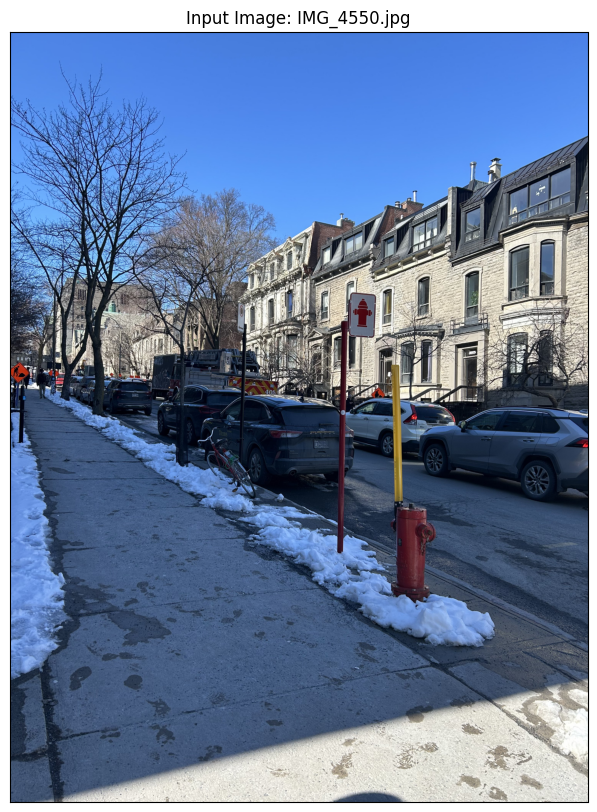

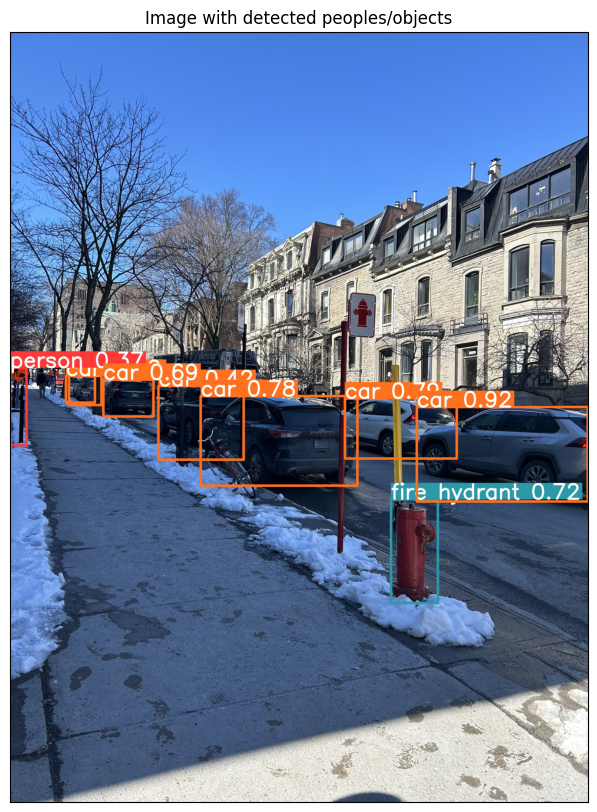

In [7]:
result_img = cv2.imread(part2_output_path+"results0.jpg")
result_img_rgb = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)

# display images
plt.figure(figsize=(10,10))
plt.imshow(street_img_rgb)
plt.title("Input Image: IMG_4550.jpg"), plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(10,10))
plt.imshow(result_img_rgb)
plt.title("Image with detected peoples/objects"), plt.xticks([]), plt.yticks([])
plt.show()